In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Titanic Dataset

In [4]:
dataset=pd.read_csv("./titanic.csv")

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Data Cleaning (Remove Unnecessary information)

In [6]:
column_to_drop=["PassengerId","Name","Ticket","Cabin","Embarked"]
dataset=dataset.drop(column_to_drop,axis=1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
def Alias_sex(sex):
    if sex.lower().startswith("m"):
        return 0
    elif sex.lower().startswith("f"):
        return 1
    else :
        return sex

dataset["Sex"]=dataset["Sex"].apply(Alias_sex)

In [8]:
#along row,if any na come drop the row if axis=1 then if any na come in column 
 #it drop all column
dataset.dropna?

In [9]:
dataset=dataset.dropna(axis=0,how="any") 
dataset=dataset.reset_index(drop=True)
dataset.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


### Correlation B/w Features of titanic Dataset

In [11]:
cor_matrix=dataset.corr() #function of pandas lib
cor_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.359653,0.538826,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.359653,1.000000,-0.155460,-0.369226,0.067247,0.025683,-0.554182
Sex,0.538826,-0.155460,1.000000,-0.093254,0.103950,0.246972,0.184994
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.017358,0.067247,0.103950,-0.308247,1.000000,0.383820,0.138329
Parch,0.093317,0.025683,0.246972,-0.189119,0.383820,1.000000,0.205119
Fare,0.268189,-0.554182,0.184994,0.096067,0.138329,0.205119,1.000000


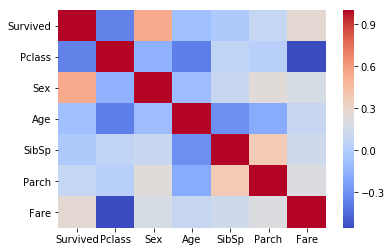

In [12]:
plt.figure()
sns.heatmap(cor_matrix,cmap="coolwarm")
plt.show()

#### Remove the label From the dataset

In [13]:
X=dataset[[each for each in dataset.columns if each!="Survived"]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 6 columns):
Pclass    714 non-null int64
Sex       714 non-null int64
Age       714 non-null float64
SibSp     714 non-null int64
Parch     714 non-null int64
Fare      714 non-null float64
dtypes: float64(2), int64(4)
memory usage: 33.5 KB


#### Label of Dataset

In [14]:
y=pd.DataFrame(dataset["Survived"],columns=["Survived"])
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## Implementation of Decision Tree